<a href="https://colab.research.google.com/github/tmdcks1103/Machine-Learning-Programming/blob/main/DL2_Wine_White.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models, layers
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/data/winequality-white.csv", sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
# 입출력 분리

# 입력(X)과 출력(Y) 데이터 분리
X = df.drop('quality', axis=1)
y = df['quality']

In [4]:
# 데이터 전처리
# 스케일링

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# 원-핫 인코딩: 딥러닝 모델의 출력 형식에 맞게 변환합니다.
# 와인 품질 '3'부터 '9'까지의 라벨을 '0'부터 '6'으로 재매핑
y_mapped = y.map({3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6})
Y_one_hot = pd.get_dummies(y_mapped).values

In [8]:
# 훈련 및 테스트 데이터 분할
X_train, X_test, y_train_one_hot, y_test_one_hot = train_test_split(
    X_scaled, Y_one_hot, test_size=0.2, random_state=0, stratify=y_mapped
)

In [13]:
# 딥러닝 모델 구축
model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(Y_one_hot.shape[1], activation="softmax")
])

# 모델 컴파일
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [12]:
# 모델 훈련
history = model.fit(
    X_train, y_train_one_hot,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3832 - loss: 1.5592 - val_accuracy: 0.5574 - val_loss: 1.1625
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5164 - loss: 1.2219 - val_accuracy: 0.5574 - val_loss: 1.1183
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5393 - loss: 1.1491 - val_accuracy: 0.5446 - val_loss: 1.0966
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5384 - loss: 1.1082 - val_accuracy: 0.5727 - val_loss: 1.0788
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5311 - loss: 1.1024 - val_accuracy: 0.5523 - val_loss: 1.0736
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5339 - loss: 1.0899 - val_accuracy: 0.5676 - val_loss: 1.0596
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5343 - loss: 1.0893 - val_accuracy: 0.5702 - val_loss: 1.0599
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5366 - loss: 1.0854 - val_accuracy: 0.

In [15]:
# 모델 평가
# 예측값과 실제값 변환
y_pred_one_hot = model.predict(X_test)
y_test_class = np.argmax(y_test_one_hot, axis=1)
y_pred_class = np.argmax(y_pred_one_hot, axis=1)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


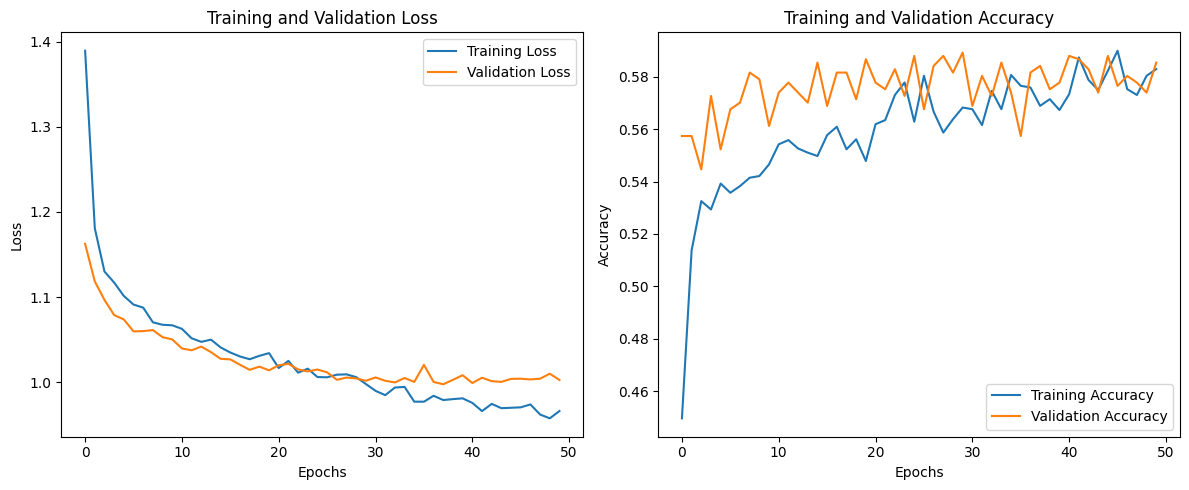

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.03      0.39      0.05        33
           2       0.19      0.03      0.05       291
           3       0.36      0.01      0.02       440
           4       0.00      0.00      0.00       176
           5       0.01      0.03      0.01        35
           6       0.00      0.00      0.00         1

    accuracy                           0.03       980
   macro avg       0.08      0.07      0.02       980
weighted avg       0.22      0.03      0.02       980


Confusion Matrix:
[[  0   1   0   0   0   0   3]
 [  0  13   1   0   0  10   9]
 [  3 112   8   7   0  87  74]
 [  6 214  15   4   0  73 128]
 [  4  95  15   0   0   8  54]
 [  0  13   3   0   0   1  18]
 [  0   1   0   0   0   0   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
# 학습 곡선 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# 최종 성능 보고서
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_class))